# ML-ZOOMCAMP CAPSTONE PROJECT-1

#### Emre Öztürk

#### Image Classification Project

#### About Data Set

Version 2

Version 2 extends the version 1 of the fastfood classification data set and introduces some new classes with new images. These new classes are :

    Baked Potato
    Crispy Chicken
    Fries
    Taco
    Taquito

The data set is divided into 4 parts, the Tensorflow Records, Training DataValidation Data** and Testing Data.
The tensorflow records directory is further divided into 3 parts, the Train, Valid and Test. These images are resized to 256 by 256 pixels. No other augmentation is applied. While loading the tensorflow records files, you can apply any augmentation you want.

    Train : Contains 15,000 training images, with each class having 1,500 images.

    Valid : Contains 3,500 validation images, with each class having 400 images.

    Test : Contains 1,500 validation images, with each class having 100/200 images.
        Unlike the Tensorflow records data, the Training data, validation data and testing data contains direct images. These are raw images. So any kind of augmentation, and specially resizing, can be applied on them. 

    Training Data : This directory contains 5 subdirectories. Each directory representing a class. Each class have 1,500 training images.

        Validation Data : This directory also contains 10 subdirectories. Each directory representing a class. Each **class have 400 images for monitoring model's performance.

        Testing Data : This directory also contains 10 subdirectories. Each directory representing a class. Each **class have 100 /200 images for evaluating model's performance
        
Dataset: 

We will have two version of this data. You can find full version below link. 

* Full: https://www.kaggle.com/datasets/utkarshsaxenadn/fast-food-classification-dataset

Second version is small version for to reduce training time. Because i will run the project locally. If you want you can work with full data set.



#### Aim of the Project

We will try the classify images corretly using Deep Learning and CNN.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

import os

import tensorflow as tf
from tensorflow import keras

import cv2

In [5]:
#You can increase jupyter notebooks widht with this code
#from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

## EDA

In [11]:
from tensorflow.keras.preprocessing.image import load_img

In [4]:
#path = '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Train/Baked Potato'

#load_img(path=path)

 `Lets see our classes using opencv library.` 

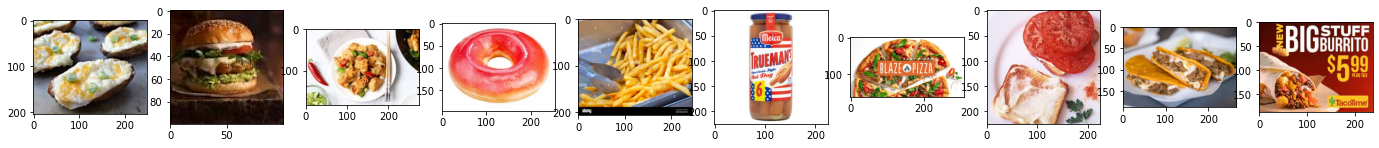

In [34]:
from matplotlib import pyplot as plt

file_names = ['/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Train/Baked Potato/Baked Potato-Train (1).jpeg', 
              '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Train/Burger/Burger-Train (1).jpeg',
              '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Train/Crispy Chicken/Crispy Chicken-Train (1).jpeg',
              '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Train/Donut/Donut (1183).jpeg',
              '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Train/Fries/Fries-Train (1).jpeg',
              '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Train/Hot Dog/Hot Dog - Train (1054).jpeg',
              '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Train/Pizza/Pizza-Train (3).jpeg',
              '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Train/Sandwich/Sandwich-Train (1).jpeg',
              '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Train/Taco/Taco-Train (1).jpeg',
              '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Train/Taquito/Taquito-Train (1).jpeg'
             ]

# create subplots instances
fig, axes = plt.subplots(1,10, figsize=(24,24))

for name, ax in zip(file_names, axes.ravel()):
  image = cv2.imread(name)

  # plot image into the subplot
  ax.imshow(image[:,:,::-1])

#### Evaulation Metric

Evaulation metric of the model will be accuracy. 

In [14]:
path = '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Train/Baked Potato/'
name = 'Baked Potato-Train (1).jpeg'
fullname = f'{path}/{name}'
img = load_img(fullname)

`Our raw image dimensions.`

In [15]:

x = np.array(img)
x.shape

(204, 248, 3)

#### We will use pre-trained CNN models with transfer Learning

`There are many models you can find. I will use Xception because it has small size and high accuracy.`
* we will train pretrained model for our purpose(for predicting our classes)

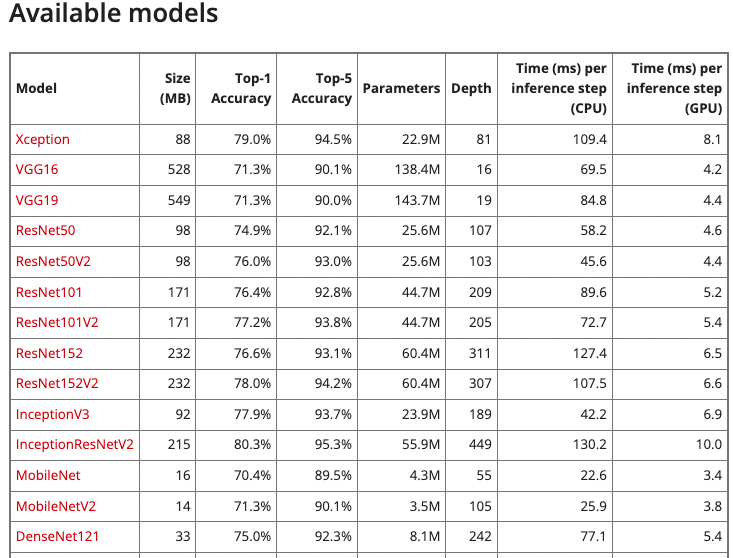

In [18]:
#Load Xception from Keras 
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [19]:
# We are specifiying we will use pre trained model over 'imagenet' dataset and size of images
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

Metal device set to: Apple M1 Pro


2022-12-22 14:44:16.467540: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-22 14:44:16.467731: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
#We will use image generator for load our image dataset and preprocess
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

#we will read from directory and preprocess, and get ready train dataset
train_ds = train_gen.flow_from_directory(
    '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Train',
    #Our image size for to train
    target_size=(150, 150),
    #How many images we read at once
    batch_size=32
)

Found 2990 images belonging to 10 classes.


In [24]:
#See our classes names
train_ds.class_indices

{'Baked Potato': 0,
 'Burger': 1,
 'Crispy Chicken': 2,
 'Donut': 3,
 'Fries': 4,
 'Hot Dog': 5,
 'Pizza': 6,
 'Sandwich': 7,
 'Taco': 8,
 'Taquito': 9}

In [25]:
#next() function does takes next batch. Actually works like for loop
#It returns 2 things Features X and Labels y
X, y = next(train_ds)

In [26]:
X.shape #batch (32), size(150x150), Red Green Blue (3)

(32, 150, 150, 3)

In [28]:
#It is actually one hot encoding. Like we are doing ten different binary classification
#As you can see we have 10 binary class choice
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

### Model `Version_1`: `150x150` images and `learning rate = 0.01`

In [29]:
#We are doing same thing for our validation dataset
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Valid',
    target_size=(150, 150),
    batch_size=32,
    #It shuffles defult . But we will only do validation, so  shuffle off
    shuffle=False
)

Found 500 images belonging to 10 classes.


In [30]:
#Our base model is Xception pretrained model.
base_model = Xception(
    #Weights means 'w1,w2,...' from 'imagenet' dataset
    weights='imagenet',
    #We only want to keep convolutional layers
    include_top=False,
    #Our images dimensions
    input_shape=(150, 150, 3)
)

#We dont want to train(change conv layers) the model again. 
#We want to use conv layers
base_model.trainable = False


#These are our images
inputs = keras.Input(shape=(150, 150, 3))

#Our base model takes inputs, not new training mentioned before
base = base_model(inputs, training=False)

#We are pooling gathered information from images to a vector form
vectors = keras.layers.GlobalAveragePooling2D()(base)

#Outputs as we have 10 different classes 
outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [31]:
learning_rate = 0.01

#Optimizer optimizes the weights w1,w2,w3,..
#There are many optimizers than Adam
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

#loss is necessary for optimizer for to how it needs to change the weights
#It measures the model is good or bad
#lower loss is better. Optimizer acts with considering loss
#CategoricalCrossentropy is for multi class classification
#If we use (from_logits=False) we need to use activation function in output Dense Layer
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

#we set parameters for our model
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [32]:
#For to train model we set data and epochs
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


2022-12-22 14:58:44.593579: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-22 14:58:46.089415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - ETA: 0s - loss: 1.6421 - accuracy: 0.6057

2022-12-22 14:59:03.095382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 20s 161ms/step - loss: 1.6421 - accuracy: 0.6057 - val_loss: 1.5434 - val_accuracy: 0.6120
Epoch 2/10
94/94 [==============================] - 14s 152ms/step - loss: 0.7686 - accuracy: 0.7682 - val_loss: 1.8241 - val_accuracy: 0.6060
Epoch 3/10
94/94 [==============================] - 14s 154ms/step - loss: 0.5858 - accuracy: 0.8251 - val_loss: 1.7998 - val_accuracy: 0.6140
Epoch 4/10
94/94 [==============================] - 15s 155ms/step - loss: 0.4201 - accuracy: 0.8729 - val_loss: 1.8813 - val_accuracy: 0.6300
Epoch 5/10
94/94 [==============================] - 15s 155ms/step - loss: 0.2922 - accuracy: 0.9040 - val_loss: 1.7246 - val_accuracy: 0.6420
Epoch 6/10
94/94 [==============================] - 15s 155ms/step - loss: 0.1714 - accuracy: 0.9425 - val_loss: 2.0256 - val_accuracy: 0.5980
Epoch 7/10
94/94 [==============================] - 14s 154ms/step - loss: 0.1572 - accuracy: 0.9428 - val_loss: 1.7941 - val_accuracy: 0.6680
Epoch 8/10

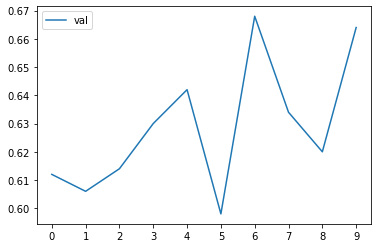

In [35]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

### Model `Version_2`: `150x150` images, multiple learning rate

In [36]:
#We make previous code as a function
#It takes learning rate for to tune
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [37]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10


2022-12-22 15:09:18.133417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - ETA: 0s - loss: 2.1693 - accuracy: 0.2441

2022-12-22 15:09:31.624990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 17s 162ms/step - loss: 2.1693 - accuracy: 0.2441 - val_loss: 1.8622 - val_accuracy: 0.3860
Epoch 2/10
94/94 [==============================] - 14s 152ms/step - loss: 1.6304 - accuracy: 0.4719 - val_loss: 1.5246 - val_accuracy: 0.5220
Epoch 3/10
94/94 [==============================] - 14s 154ms/step - loss: 1.3601 - accuracy: 0.5819 - val_loss: 1.3549 - val_accuracy: 0.5800
Epoch 4/10
94/94 [==============================] - 15s 155ms/step - loss: 1.2065 - accuracy: 0.6365 - val_loss: 1.2573 - val_accuracy: 0.6100
Epoch 5/10
94/94 [==============================] - 15s 155ms/step - loss: 1.1052 - accuracy: 0.6592 - val_loss: 1.1913 - val_accuracy: 0.6220
Epoch 6/10
94/94 [==============================] - 15s 155ms/step - loss: 1.0320 - accuracy: 0.6786 - val_loss: 1.1457 - val_accuracy: 0.6260
Epoch 7/10
94/94 [==============================] - 15s 155ms/step - loss: 0.9752 - accuracy: 0.6993 - val_loss: 1.1141 - val_accuracy: 0.6300
Epoch 8/10

2022-12-22 15:11:47.283742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - ETA: 0s - loss: 1.3220 - accuracy: 0.5602

2022-12-22 15:12:00.611562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 17s 163ms/step - loss: 1.3220 - accuracy: 0.5602 - val_loss: 1.0572 - val_accuracy: 0.6320
Epoch 2/10
94/94 [==============================] - 15s 156ms/step - loss: 0.8213 - accuracy: 0.7351 - val_loss: 0.9858 - val_accuracy: 0.6480
Epoch 3/10
94/94 [==============================] - 15s 157ms/step - loss: 0.6747 - accuracy: 0.7819 - val_loss: 0.9824 - val_accuracy: 0.6540
Epoch 4/10
94/94 [==============================] - 15s 155ms/step - loss: 0.5897 - accuracy: 0.8127 - val_loss: 0.9911 - val_accuracy: 0.6520
Epoch 5/10
94/94 [==============================] - 15s 157ms/step - loss: 0.5128 - accuracy: 0.8448 - val_loss: 1.0160 - val_accuracy: 0.6460
Epoch 6/10
94/94 [==============================] - 15s 155ms/step - loss: 0.4519 - accuracy: 0.8736 - val_loss: 0.9640 - val_accuracy: 0.6580
Epoch 7/10
94/94 [==============================] - 15s 155ms/step - loss: 0.4015 - accuracy: 0.8826 - val_loss: 0.9950 - val_accuracy: 0.6680
Epoch 8/10

2022-12-22 15:14:17.539431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - ETA: 0s - loss: 1.7448 - accuracy: 0.5973

2022-12-22 15:14:30.884182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 17s 162ms/step - loss: 1.7448 - accuracy: 0.5973 - val_loss: 1.5393 - val_accuracy: 0.6280
Epoch 2/10
94/94 [==============================] - 14s 153ms/step - loss: 0.8606 - accuracy: 0.7619 - val_loss: 2.1091 - val_accuracy: 0.5780
Epoch 3/10
94/94 [==============================] - 15s 160ms/step - loss: 0.5988 - accuracy: 0.8214 - val_loss: 1.6667 - val_accuracy: 0.6380
Epoch 4/10
94/94 [==============================] - 15s 156ms/step - loss: 0.3411 - accuracy: 0.8873 - val_loss: 1.7239 - val_accuracy: 0.6240
Epoch 5/10
94/94 [==============================] - 15s 159ms/step - loss: 0.2475 - accuracy: 0.9194 - val_loss: 1.7573 - val_accuracy: 0.6140
Epoch 6/10
94/94 [==============================] - 15s 154ms/step - loss: 0.2411 - accuracy: 0.9161 - val_loss: 1.7995 - val_accuracy: 0.6380
Epoch 7/10
94/94 [==============================] - 15s 158ms/step - loss: 0.1529 - accuracy: 0.9495 - val_loss: 2.0091 - val_accuracy: 0.6280
Epoch 8/10

2022-12-22 15:16:47.751041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - ETA: 0s - loss: 14.9699 - accuracy: 0.5692

2022-12-22 15:17:01.262471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 17s 165ms/step - loss: 14.9699 - accuracy: 0.5692 - val_loss: 15.9098 - val_accuracy: 0.5060
Epoch 2/10
94/94 [==============================] - 15s 155ms/step - loss: 7.8668 - accuracy: 0.7090 - val_loss: 15.4925 - val_accuracy: 0.5540
Epoch 3/10
94/94 [==============================] - 15s 155ms/step - loss: 5.6148 - accuracy: 0.7796 - val_loss: 16.7462 - val_accuracy: 0.5620
Epoch 4/10
94/94 [==============================] - 15s 155ms/step - loss: 4.3956 - accuracy: 0.8134 - val_loss: 15.9223 - val_accuracy: 0.6300
Epoch 5/10
94/94 [==============================] - 14s 154ms/step - loss: 4.6476 - accuracy: 0.8197 - val_loss: 18.9593 - val_accuracy: 0.6120
Epoch 6/10
94/94 [==============================] - 14s 154ms/step - loss: 3.8405 - accuracy: 0.8421 - val_loss: 15.3537 - val_accuracy: 0.6300
Epoch 7/10
94/94 [==============================] - 14s 154ms/step - loss: 2.5500 - accuracy: 0.8866 - val_loss: 19.0660 - val_accuracy: 0.6180
Ep

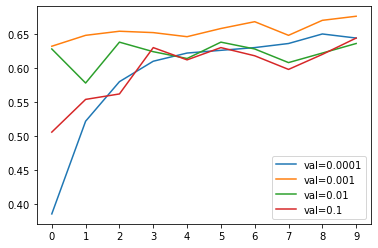

In [38]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

### Insights

`It seems changing learning rate doesn't affected the val_accuray so much. But seems 0.001 learning rate is best, 0.0001 seems second. Model has still poor performance.`

In [39]:
#As we see in the chart learning rate 0.001 is better them all
#And we set learning rate as 0.001
learning_rate = 0.001

In [40]:
#Keras has callbacks for gather information from model during training
chechpoint = keras.callbacks.ModelCheckpoint(
    #file name, shows epoch count and val accuracy
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    #It will save best model which has best val accuracy
    save_best_only=True,
    monitor='val_accuracy',
    #we choose max because we want to maximize the accuracy
    mode='max'
)

In [ ]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

### Model `Version_3` : `150x150` images, `learning rate=0.001`, Adding More Layers

`ReLu Activation function`

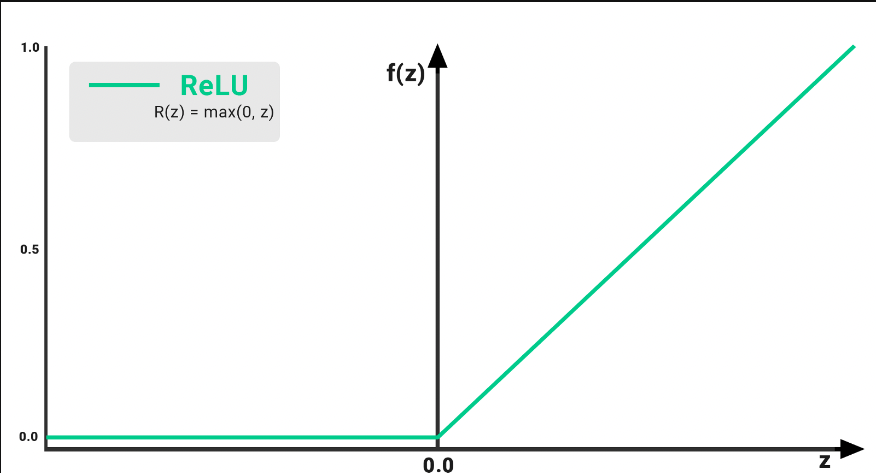

In [41]:
#In this function we will add more layer which is inner layer
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    #we are adding inner layer whic has size 100
    #it takes vectors representation
    #we also need to add activation function (Relu) which fires 
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    #now output layer takes inner layers representation
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [42]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10


2022-12-22 15:32:20.080153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - ETA: 0s - loss: 1.8112 - accuracy: 0.3836

2022-12-22 15:32:33.798981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 18s 163ms/step - loss: 1.8112 - accuracy: 0.3836 - val_loss: 1.4973 - val_accuracy: 0.5160
Epoch 2/10
94/94 [==============================] - 14s 152ms/step - loss: 1.2169 - accuracy: 0.6164 - val_loss: 1.2723 - val_accuracy: 0.5800
Epoch 3/10
94/94 [==============================] - 15s 155ms/step - loss: 0.9727 - accuracy: 0.6993 - val_loss: 1.2199 - val_accuracy: 0.6040
Epoch 4/10
94/94 [==============================] - 15s 155ms/step - loss: 0.8463 - accuracy: 0.7401 - val_loss: 1.1578 - val_accuracy: 0.6040
Epoch 5/10
94/94 [==============================] - 15s 155ms/step - loss: 0.7381 - accuracy: 0.7742 - val_loss: 1.1768 - val_accuracy: 0.6040
Epoch 6/10
94/94 [==============================] - 15s 155ms/step - loss: 0.6790 - accuracy: 0.7980 - val_loss: 1.1159 - val_accuracy: 0.6100
Epoch 7/10
94/94 [==============================] - 15s 156ms/step - loss: 0.6032 - accuracy: 0.8211 - val_loss: 1.2092 - val_accuracy: 0.5940
Epoch 8/10

2022-12-22 15:34:49.791361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - ETA: 0s - loss: 1.2596 - accuracy: 0.5793

2022-12-22 15:35:03.988129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 18s 169ms/step - loss: 1.2596 - accuracy: 0.5793 - val_loss: 1.0764 - val_accuracy: 0.6260
Epoch 2/10
94/94 [==============================] - 14s 153ms/step - loss: 0.7335 - accuracy: 0.7612 - val_loss: 1.0058 - val_accuracy: 0.6520
Epoch 3/10
94/94 [==============================] - 15s 157ms/step - loss: 0.5368 - accuracy: 0.8231 - val_loss: 1.0564 - val_accuracy: 0.6800
Epoch 4/10
94/94 [==============================] - 15s 155ms/step - loss: 0.4093 - accuracy: 0.8746 - val_loss: 1.0899 - val_accuracy: 0.6620
Epoch 5/10
94/94 [==============================] - 15s 156ms/step - loss: 0.3020 - accuracy: 0.9124 - val_loss: 1.1660 - val_accuracy: 0.6420
Epoch 6/10
94/94 [==============================] - 15s 155ms/step - loss: 0.2324 - accuracy: 0.9428 - val_loss: 1.1208 - val_accuracy: 0.6700
Epoch 7/10
94/94 [==============================] - 15s 155ms/step - loss: 0.1738 - accuracy: 0.9625 - val_loss: 1.1624 - val_accuracy: 0.6680
Epoch 8/10

2022-12-22 15:37:20.738679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - ETA: 0s - loss: 1.2719 - accuracy: 0.5973

2022-12-22 15:37:34.694090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 18s 168ms/step - loss: 1.2719 - accuracy: 0.5973 - val_loss: 1.1018 - val_accuracy: 0.6140
Epoch 2/10
94/94 [==============================] - 15s 155ms/step - loss: 0.6367 - accuracy: 0.7843 - val_loss: 0.9878 - val_accuracy: 0.6680
Epoch 3/10
94/94 [==============================] - 15s 160ms/step - loss: 0.4357 - accuracy: 0.8515 - val_loss: 1.1592 - val_accuracy: 0.6540
Epoch 4/10
94/94 [==============================] - 15s 157ms/step - loss: 0.2653 - accuracy: 0.9191 - val_loss: 1.1527 - val_accuracy: 0.6480
Epoch 5/10
94/94 [==============================] - 15s 158ms/step - loss: 0.1651 - accuracy: 0.9579 - val_loss: 1.1491 - val_accuracy: 0.6800
Epoch 6/10
94/94 [==============================] - 15s 158ms/step - loss: 0.0879 - accuracy: 0.9826 - val_loss: 1.3171 - val_accuracy: 0.6760
Epoch 7/10
94/94 [==============================] - 15s 159ms/step - loss: 0.0566 - accuracy: 0.9900 - val_loss: 1.3269 - val_accuracy: 0.6640
Epoch 8/10

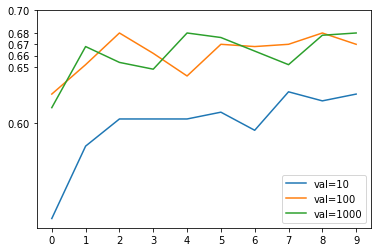

In [46]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.60, 0.65,0.66,0.67,0.68, 0.70])
plt.legend()

### Insights

`While adjusting the learning rate best val_accuracy was 0.6760. Now our new best is 0.68. It seems it doesn't worth for adding inner layer. But 100 will be ok.`


### Model `Version_4` : `150x150` images, `learning rate=0.001`, inner = 100, using drop outs

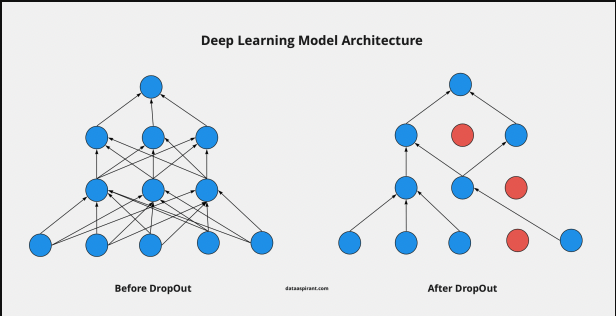

In [47]:
#In this function we will add 'droprate' for regularization in inner layer
#droprate is how much freeze the network part in this case %50

def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    #drop takes inner representations
    drop = keras.layers.Dropout(droprate)(inner)
    
    #now output layer takes 'drop' representations
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [48]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30


2022-12-22 15:52:27.363467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - ETA: 0s - loss: 1.2427 - accuracy: 0.5876

2022-12-22 15:52:41.242847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 18s 168ms/step - loss: 1.2427 - accuracy: 0.5876 - val_loss: 1.0596 - val_accuracy: 0.6400
Epoch 2/30
94/94 [==============================] - 14s 151ms/step - loss: 0.7053 - accuracy: 0.7656 - val_loss: 1.0436 - val_accuracy: 0.6500
Epoch 3/30
94/94 [==============================] - 15s 156ms/step - loss: 0.5186 - accuracy: 0.8268 - val_loss: 1.0548 - val_accuracy: 0.6640
Epoch 4/30
94/94 [==============================] - 15s 155ms/step - loss: 0.3721 - accuracy: 0.8896 - val_loss: 1.0626 - val_accuracy: 0.6840
Epoch 5/30
94/94 [==============================] - 15s 156ms/step - loss: 0.2863 - accuracy: 0.9174 - val_loss: 1.1351 - val_accuracy: 0.6780
Epoch 6/30
94/94 [==============================] - 15s 156ms/step - loss: 0.1870 - accuracy: 0.9599 - val_loss: 1.1721 - val_accuracy: 0.6600
Epoch 7/30
94/94 [==============================] - 15s 158ms/step - loss: 0.1267 - accuracy: 0.9773 - val_loss: 1.1940 - val_accuracy: 0.6640
Epoch 8/30

2022-12-22 15:59:55.939829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - ETA: 0s - loss: 1.3477 - accuracy: 0.5575

2022-12-22 16:00:10.123856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 19s 169ms/step - loss: 1.3477 - accuracy: 0.5575 - val_loss: 1.0736 - val_accuracy: 0.6440
Epoch 2/30
94/94 [==============================] - 14s 151ms/step - loss: 0.8292 - accuracy: 0.7284 - val_loss: 1.0418 - val_accuracy: 0.6580
Epoch 3/30
94/94 [==============================] - 15s 158ms/step - loss: 0.6742 - accuracy: 0.7766 - val_loss: 1.0320 - val_accuracy: 0.6580
Epoch 4/30
94/94 [==============================] - 15s 160ms/step - loss: 0.5288 - accuracy: 0.8284 - val_loss: 1.0572 - val_accuracy: 0.6580
Epoch 5/30
94/94 [==============================] - 15s 157ms/step - loss: 0.4176 - accuracy: 0.8672 - val_loss: 1.0811 - val_accuracy: 0.6460
Epoch 6/30
94/94 [==============================] - 15s 158ms/step - loss: 0.3393 - accuracy: 0.8870 - val_loss: 1.0275 - val_accuracy: 0.6700
Epoch 7/30
94/94 [==============================] - 15s 157ms/step - loss: 0.2651 - accuracy: 0.9221 - val_loss: 1.0893 - val_accuracy: 0.6680
Epoch 8/30

2022-12-22 16:07:21.813441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - ETA: 0s - loss: 1.5689 - accuracy: 0.4860

2022-12-22 16:07:36.174642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 19s 174ms/step - loss: 1.5689 - accuracy: 0.4860 - val_loss: 1.1564 - val_accuracy: 0.6160
Epoch 2/30
94/94 [==============================] - 15s 159ms/step - loss: 1.0588 - accuracy: 0.6522 - val_loss: 1.0592 - val_accuracy: 0.6440
Epoch 3/30
94/94 [==============================] - 15s 161ms/step - loss: 0.8925 - accuracy: 0.7090 - val_loss: 1.0656 - val_accuracy: 0.6340
Epoch 4/30
94/94 [==============================] - 15s 159ms/step - loss: 0.7497 - accuracy: 0.7522 - val_loss: 0.9933 - val_accuracy: 0.6500
Epoch 5/30
94/94 [==============================] - 15s 158ms/step - loss: 0.6451 - accuracy: 0.7876 - val_loss: 0.9938 - val_accuracy: 0.6620
Epoch 6/30
94/94 [==============================] - 15s 163ms/step - loss: 0.5733 - accuracy: 0.8104 - val_loss: 1.0146 - val_accuracy: 0.6360
Epoch 7/30
94/94 [==============================] - 15s 161ms/step - loss: 0.5361 - accuracy: 0.8224 - val_loss: 1.0194 - val_accuracy: 0.6620
Epoch 8/30

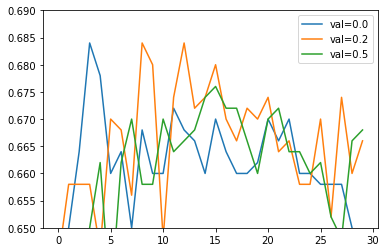

In [51]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.65, 0.69)
plt.legend()

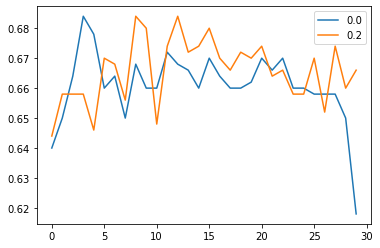

In [52]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()

### Insights

`While adjusting the learning rate best val_accuracy was 0.6760. After adding inner layer best was 0.68.
Now we have 0.684. Quite dissopentment. It seems it doesn't worth for dropout. But 0.2 will be ok. It is we need data augmenttion`


### Model `Version_5` : `150x150` images, `learning rate=0.001`, inner = 100, using drop outs, Data Augmentation

### Insights

`Since we have fast we data. I think rotating the foods could be good for augmentation.`

In [55]:
#we can do data augmentation in ImageDataGenerator
#We apply augmentation training dataset
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #It chooses randomly between -30, 30 
    #rotation_range=30,
    #It chooses randomly between -10, 10 
    #width_shift_range=10.0,
    #height_shift_range=10.0,
    shear_range=10.0,
    #Between 0.9,1.1
    zoom_range=0.1,
    vertical_flip=True,
    horizontal_flip=True,
)

train_ds = train_gen.flow_from_directory(
    '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Train',
    target_size=(150, 150),
    batch_size=32
)

#We do not apply augmentation on validation dataset. Because it generates random images
#and we want to compare our model with other models
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Valid',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 2990 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [56]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


2022-12-22 16:28:29.780616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - ETA: 0s - loss: 1.5083 - accuracy: 0.4930

2022-12-22 16:28:44.732539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 19s 175ms/step - loss: 1.5083 - accuracy: 0.4930 - val_loss: 1.1498 - val_accuracy: 0.6040
Epoch 2/50
94/94 [==============================] - 15s 160ms/step - loss: 1.0746 - accuracy: 0.6482 - val_loss: 1.0090 - val_accuracy: 0.6680
Epoch 3/50
94/94 [==============================] - 15s 161ms/step - loss: 0.9591 - accuracy: 0.6853 - val_loss: 1.0086 - val_accuracy: 0.6480
Epoch 4/50
94/94 [==============================] - 15s 162ms/step - loss: 0.8748 - accuracy: 0.7097 - val_loss: 1.0630 - val_accuracy: 0.6140
Epoch 5/50
94/94 [==============================] - 15s 163ms/step - loss: 0.8056 - accuracy: 0.7338 - val_loss: 1.0652 - val_accuracy: 0.6540
Epoch 6/50
94/94 [==============================] - 15s 162ms/step - loss: 0.7678 - accuracy: 0.7321 - val_loss: 1.0468 - val_accuracy: 0.6540
Epoch 7/50
94/94 [==============================] - 15s 164ms/step - loss: 0.6998 - accuracy: 0.7629 - val_loss: 0.9968 - val_accuracy: 0.6600
Epoch 8/50

KeyboardInterrupt: 

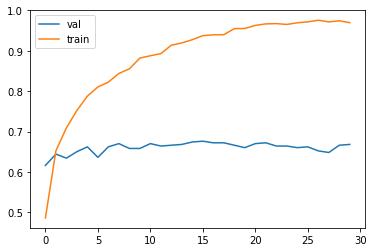

In [57]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

### Insights

`Seem augmentation made it worse. Maybe Larger images?`

### Model `Version_6` : `299x299` images, `learning rate=0.005`, inner = 100, using drop outs = 0.2 , No Data Augmenation

In [62]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [63]:
input_size = 299

In [64]:
#we can do data augmentation in ImageDataGenerator
#We apply augmentation training dataset
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    #It chooses randomly between -30, 30 
    #rotation_range=30,
    #It chooses randomly between -10, 10 
    #width_shift_range=10.0,
    #height_shift_range=10.0,
    shear_range=10.0,
    #Between 0.9,1.1
    zoom_range=0.1,
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory(
    '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Train',
    target_size=(150, 150),
    batch_size=32
)

#We do not apply augmentation on validation dataset. Because it generates random images
#and we want to compare our model with other models
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    '/Users/kadkoy/Desktop/ml-zoomcamp-capstone-project-2022/dataset/fast-food-classification-v2-small/Valid',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 2990 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [65]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [66]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50


2022-12-22 16:42:55.192882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - ETA: 0s - loss: 1.6289 - accuracy: 0.4492

2022-12-22 16:43:09.538276: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 24s 239ms/step - loss: 1.6289 - accuracy: 0.4492 - val_loss: 1.5034 - val_accuracy: 0.6760
Epoch 2/50
94/94 [==============================] - 23s 240ms/step - loss: 1.1474 - accuracy: 0.6177 - val_loss: 1.4224 - val_accuracy: 0.7020
Epoch 3/50
94/94 [==============================] - 21s 228ms/step - loss: 0.9864 - accuracy: 0.6766 - val_loss: 1.3671 - val_accuracy: 0.6780
Epoch 4/50
94/94 [==============================] - 21s 228ms/step - loss: 0.9022 - accuracy: 0.6923 - val_loss: 1.2600 - val_accuracy: 0.6500
Epoch 5/50
94/94 [==============================] - 23s 241ms/step - loss: 0.8356 - accuracy: 0.7154 - val_loss: 1.2825 - val_accuracy: 0.6720
Epoch 6/50
94/94 [==============================] - 23s 239ms/step - loss: 0.7664 - accuracy: 0.7498 - val_loss: 1.2790 - val_accuracy: 0.6620
Epoch 7/50
94/94 [==============================] - 21s 223ms/step - loss: 0.7031 - accuracy: 0.7686 - val_loss: 1.2366 - val_accuracy: 0.6640
Epoch 8/50

KeyboardInterrupt: 

### Conclusion.

`Not all projects being successfully with less data or bad data.This project shows us we need more data or labeling data for better accuracy. For my limited time i didnt use large data set. You can try. I hope you enjoyed the projetc.`